# Punktpartikkel i 2D

### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 1

Det elektriske felt og potensial for en punktpartikkel er allerede kjent i vilkårlig dimensjon. Hensikten med denne øvingen er å lære hvordan man håndterer numerikk i flere dimensjoner, både mht. de forskjellige metodene som fins for å plotte 2-dimensjonale systemer, og bruk av meshgrids. Det forventes at bruk av 1-dimensjonale arrays er kjent fra tidligere. 

### Oppgave 1: Elektrisk Potensial

Fra Coloumbs lov er det kjent at det elektriske potensialet i 2 dimensjoner en avstand, $r = \sqrt{x^2 + y^2}$, fra en punktpartikkel med ladning $q$ er gitt ved 
\begin{equation}
V(r) = \frac{q}{4\pi \epsilon_0}\frac{1}{r}\text{,}
\end{equation}
hvor $\epsilon_0$ er den elektriske permittivitet i vakum. Første del av øvingen vil gå ut på å plotte dette potensialet for en punktpartikkel med ladning $q = e$ plassert i origo, mellom $\pm L = \pm 10\text{nm}$.

$\textbf{a)}$ Ofte når man jobber med numerikk er det hensiktsmessig å innføre nye dimensjonsløse variabler, f.eks. $v/c$ hvis man jobber med hastigheter nær lysets hastighet, eller $V/V_0$ om man jobber med et konstant potensial. Utfør et slikt variabelskifte på potensialet og posisjonen slik at de blir dimensjonsløse.

------------

Skriv her eller på papir

***
Enheter:
V {J/C},
$\epsilon_0$ {C^2/(J*m)}

Innfører $\tilde{V}(r) = \frac{V(r)}{V_0}$, der $V_0 = \frac{q}{4\pi\epsilon_0}\frac{1}{r_0}$ og $r_0$ er en valgt referanseavstand.

Får da 
\begin{equation}
\tilde{V}(r) = \frac{r_0}{r}
\end{equation}

der $\tilde{V}$ er dimensjonsløs.
***

----------------

$\textbf{b)}$ For å løse problemer i to dimensjoner er det nødvendig med en ny måte å diskretisere koordinatene. Det er ikke lenger tilstrekkelig med éndimensjonale $1 \times n$ arrays. Vi trenger enten en $n \times n$ array hvor hvert punkt er en 2-dimensjonal vektor, eller en separat $n \times n$ array for hver akse. I denne øvingen skal vi bruke den sistnevnte metoden, ved å bruke $\texttt{numpy}$s $\texttt{meshgrid}$ funksjon.

Bruk $\texttt{np.meshgrid}$ til å generere to variabler, $\texttt{xv}$ og $\texttt{yv}$, som inneholder $x$ og $y$ koordinater respektivt.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as c

In [144]:
npoints: int = 100
L = 10          # nm
x_axis: np.ndarray = np.linspace(-L, L, npoints)
y_axis: np.ndarray = np.linspace(-L, L, npoints)

def generate_meshgrid(x: np.ndarray, y: np.ndarray) -> tuple[np.ndarray]:
    return np.meshgrid(x, y)

xv, yv = generate_meshgrid(x_axis, y_axis)


$\textbf{c)}$ Via bruk av array-operasjoner, lag en variabel $\texttt{V}$ som inneholder potensialet $V$ for alle $x$ og $y$. Merk at det her vil oppstå en singularitet i $\vec{r} = 0$ som må tas stilling til. En måte å håndtere dette problemet er å sette verdien for potensialet over en viss grense lik konstant, f.eks. $\texttt{V[}>\texttt{c]} = \texttt{c}$.

In [145]:
# Bruker ikke disse for å regne ut dimensjonsløst potensial
    # q = c.elementary_charge
    # k = 1/((4*c.pi*c.epsilon_0))
    # V = k*q/r


# Konstanter
r_0 = 0.1  # referanseavstand (nm)
V_max = 0.1  # maks potensial i plot 


# Dimensjonsløst potensial V_tilde
V_tilde = r_0 / np.sqrt(xv**2 + yv**2)
V_tilde = np.where(V_tilde < V_max, V_tilde, V_max)     # setter potensialet over V_max til V_max


$\textbf{d)}$ Plot det dimensjonsløse potensialet $V$ både som en heatmap og som en 3d overflate.

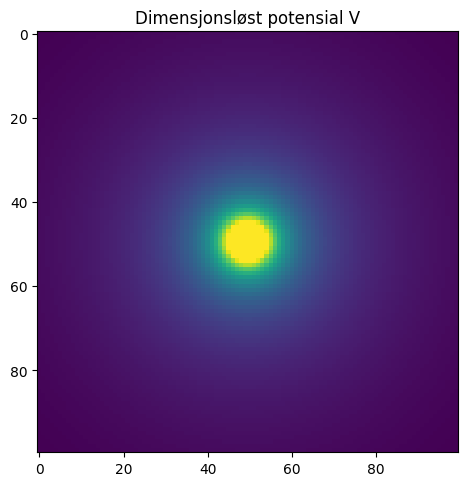

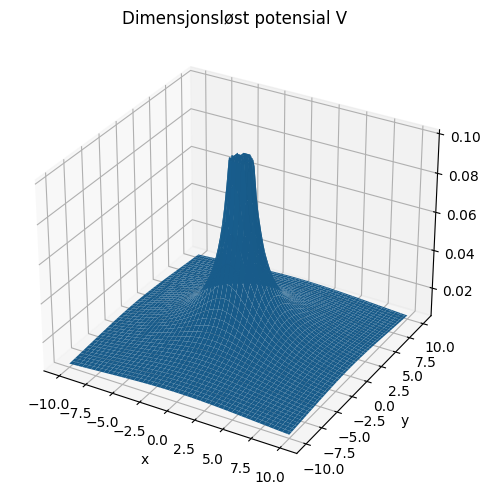

In [146]:
def plot_heatmap(potensial: np.ndarray, title: str) -> None:
    fig, ax = plt.subplots()
    fig.tight_layout()
    ax.imshow(potensial)
    ax.set_title(title)

def plot_3d(x: np.ndarray, y: np.ndarray, potensial: np.ndarray, title: str) -> None:
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
    fig.tight_layout()
    ax.plot_surface(x, y, potensial)
    ax.set_title(title)
    ax.set_ylabel("y")
    ax.set_xlabel("x")

plot_heatmap(V_tilde, "Dimensjonsløst potensial V")
plot_3d(xv, yv, V_tilde, "Dimensjonsløst potensial V")

plt.show()

### Oppgave 2: Elektrisk Felt

Det elektriske felt for en punktpartikkel er også kjent fra Coloumbs lov, men generelt hvis man vet potensialet kan en finne det elektriske feltet ved å bruke gradienten, $\vec{E}=-\nabla V$. I én dimensjon er gradienten kun en vanlig derivert, og vi får $E(r) = -\frac{\text{d}V(r)}{\text{d}r}$. En kan beregne dette numerisk ved å diskretisere derivasjonen,
\begin{equation}
    E(r_\text{i}) = -\frac{V(r_\text{i+1})-V(r_\text{i-1})}{r_\text{i+1}-r_\text{i-1}}\text{.}
\end{equation}
Dette er et eksempel på en finite difference quotient, mer spesifikt er dette en $\textit{central finite difference quotient}$. 

$\textbf{a)}$ Utled en diskret formulering for gradienten i to dimensjoner med bruk av finite difference quotients.

----------------

Skriv her eller på papir

***
Gradienten i kartetiske koordinater kan tenkes på som en vektor med deriveringsoperatorer:
$\nabla = (\frac{\partial}{\partial x},\frac{\partial}{\partial y})$

En diskret formulering for gradienten vil da bli:
\begin{equation}
    \vec{E}(x_i, y_i) = -\nabla V 
        \approx 
        -(\frac{V(x_{i+1},\,y_i)-V(x_{i-1},\,y_i)}{x_{i+1}-x_{i-1}},
        \frac{V(x_{i},\,y_{i+1})-V(x_i,\,y_{i-1})}{y_{i+1}-y_{i-1}})
\end{equation}
***

------------------

$\textbf{b)}$ Lag en funksjon som tar inn et potensial $\texttt{V}$ som argument, regner ut gradienten i hvert punkt, og returnerer det elektriske feltet som to $n-2 \times n-2$ arrays (årsaken til at dimensjonen blir $n-2$ og ikke $n$ er at man ikke kan beregne gradienten på randen med central finite differences, men må da bruke enten det som kalles forward/backward finite differences).

$\textit{Hint:}$ Bruk array slicing for å gjøre koden mer effektiv.

In [147]:
def discrete_grad(dep_var: np.ndarray, ind_var: np.ndarray):
    # initialisere array
    grad = np.zeros(len(dep_var)-2)
    
    # fylle med gradientkomponenter (central finite differences)
    for i in range(1, len(dep_var)-1):
        grad[i-1] = (dep_var[i+1]-dep_var[i-1])/(ind_var[i+1]-ind_var[i-1])
    return grad

def calculate_electric_field(xv, yv, potensial: np.ndarray) -> tuple[np.ndarray]:
    # initialisere arrays
    field_x = np.zeros((len(potensial[0])-2, len(potensial[0])-2))
    field_y = np.zeros((len(potensial[:,])-2, len(potensial[:,])-2))
    
    # fylle med verdier
    for i in range(1, len(potensial)-1):
        field_x[i-1] = discrete_grad(potensial[i], xv[0])
    for i in range(1, len(potensial[:,]) - 1):
        field_y[:,i-1] = discrete_grad(potensial[:,i], yv[:,0])
    
    return field_x, field_y

$\textbf{c)}$ Plot det dimensjonsløse elektriske feltet til en punktpartikkel i to dimensjoner ved bruk av $\texttt{matplotlib}$s $\texttt{quiverplot}$.

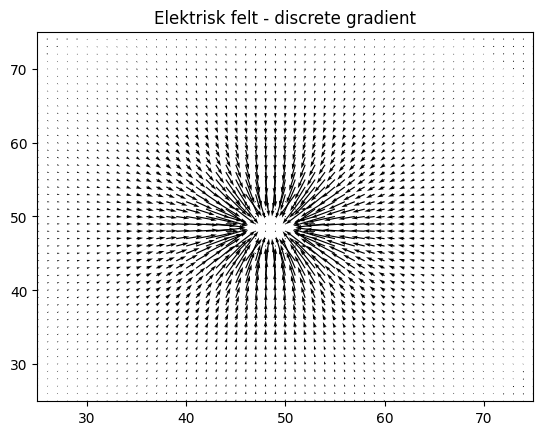

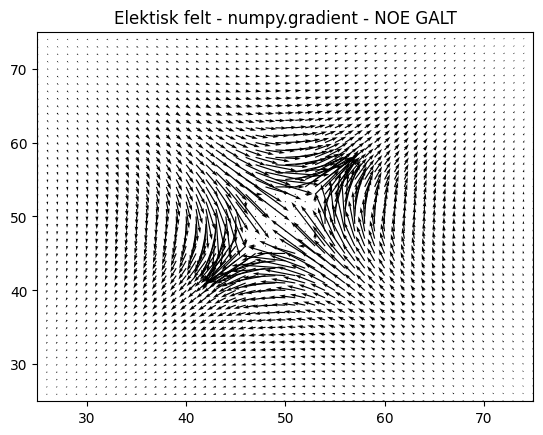

In [161]:
# bruke calculate_electric_field fra b)
def electric_field_quiver() -> None:
    fig, ax = plt.subplots()
    ax.quiver(*calculate_electric_field(xv, yv, V_tilde), scale=1)
    ax.set_ylim(25,75)
    ax.set_xlim(25,75)
    ax.set_title("Elektrisk felt - discrete gradient")

# Kan kanskje bruke np.gradient?
def electric_field_quiver_numpy() -> None:
    fig, ax = plt.subplots()
    ax.quiver(*(-(np.array(np.gradient(V_tilde)))))             #! noe som ikke stemmer her
    ax.set_ylim(25,75)
    ax.set_xlim(25,75)
    ax.set_title("Elektisk felt - numpy.gradient - NOE GALT")


electric_field_quiver()
electric_field_quiver_numpy()
